In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
%matplotlib inline

In [32]:
rhpass=pd.read_csv("ssh_filters_password_redhat-wireshark.csv", parse_dates=['Time'])
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info
0,2011-11-05 08:09:34,10.10.10.5,10.10.10.15,SSHv2,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
1,2011-11-05 08:09:34,10.10.10.15,10.10.10.5,SSHv2,82,Client: Protocol (SSH-2.0-PuTTY_Release_0.61)
2,2011-11-05 08:09:34,10.10.10.15,10.10.10.5,SSHv2,182,Client: Key Exchange Init
3,2011-11-05 08:09:34,10.10.10.5,10.10.10.15,SSHv2,598,Server: Key Exchange Init
4,2011-11-05 08:09:34,10.10.10.15,10.10.10.5,SSHv2,70,Client: Diffie-Hellman Group Exchange Request ...


In [33]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [34]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2011-11-05 08:09:34,10.10.10.5,10.10.10.15,SSHv2,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
1,2011-11-05 08:09:34,10.10.10.15,10.10.10.5,SSHv2,82,Client: Protocol (SSH-2.0-PuTTY_Release_0.61),Server
2,2011-11-05 08:09:34,10.10.10.15,10.10.10.5,SSHv2,182,Client: Key Exchange Init,Server
3,2011-11-05 08:09:34,10.10.10.5,10.10.10.15,SSHv2,598,Server: Key Exchange Init,Client
4,2011-11-05 08:09:34,10.10.10.15,10.10.10.5,SSHv2,70,Client: Diffie-Hellman Group Exchange Request ...,Server


In [35]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,77,2011-11-05 08:09:34,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
1,82,2011-11-05 08:09:34,Client: Protocol (SSH-2.0-PuTTY_Release_0.61)
2,182,2011-11-05 08:09:34,Client: Key Exchange Init
3,598,2011-11-05 08:09:34,Server: Key Exchange Init
4,70,2011-11-05 08:09:34,Client: Diffie-Hellman Group Exchange Request ...


In [36]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-05 08:09:34,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1)
2011-11-05 08:09:34,82,Client: Protocol (SSH-2.0-PuTTY_Release_0.61)
2011-11-05 08:09:34,182,Client: Key Exchange Init
2011-11-05 08:09:34,598,Server: Key Exchange Init
2011-11-05 08:09:34,70,Client: Diffie-Hellman Group Exchange Request ...


In [37]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-05 08:09:00,6549
2011-11-05 08:10:00,31624
2011-11-05 08:11:00,7430
2011-11-05 08:12:00,NaN
2011-11-05 08:13:00,14500


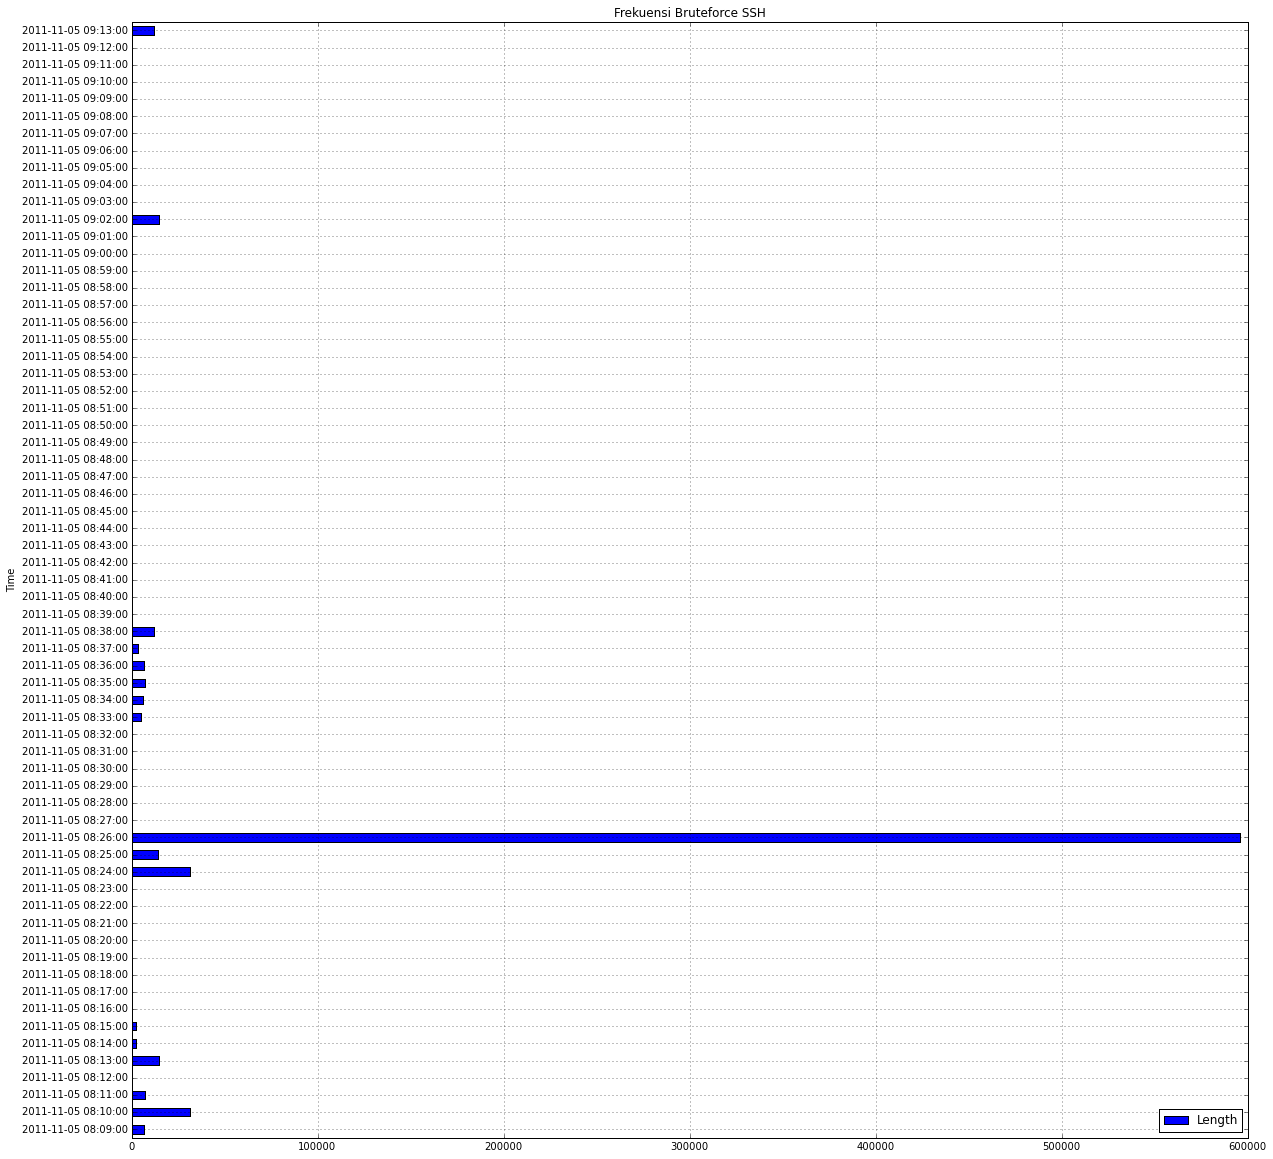

In [38]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frekuensi Bruteforce SSH",figsize=(20,20))

In [39]:
#fig = infodata2_plot.get_figure()
#fig.savefig("total-frekuensi-bruteforce-ssh.png")

In [40]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2011-11-05 08:09:34,10.10.10.5,10.10.10.15,SSHv2,77,Server: Protocol (SSH-1.99-OpenSSH_3.5p1),Client
1,2011-11-05 08:09:34,10.10.10.15,10.10.10.5,SSHv2,82,Client: Protocol (SSH-2.0-PuTTY_Release_0.61),Server
2,2011-11-05 08:09:34,10.10.10.15,10.10.10.5,SSHv2,182,Client: Key Exchange Init,Server
3,2011-11-05 08:09:34,10.10.10.5,10.10.10.15,SSHv2,598,Server: Key Exchange Init,Client
4,2011-11-05 08:09:34,10.10.10.15,10.10.10.5,SSHv2,70,Client: Diffie-Hellman Group Exchange Request ...,Server


In [41]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source      Destination Protocol        
10.10.10.15 10.10.10.5  SSHv2     640284
10.10.10.35 10.10.10.5  SSHv2      14838
10.10.10.5  10.10.10.15 SSHv2     107582
            10.10.10.35 SSHv1      11971
                        TCP           77

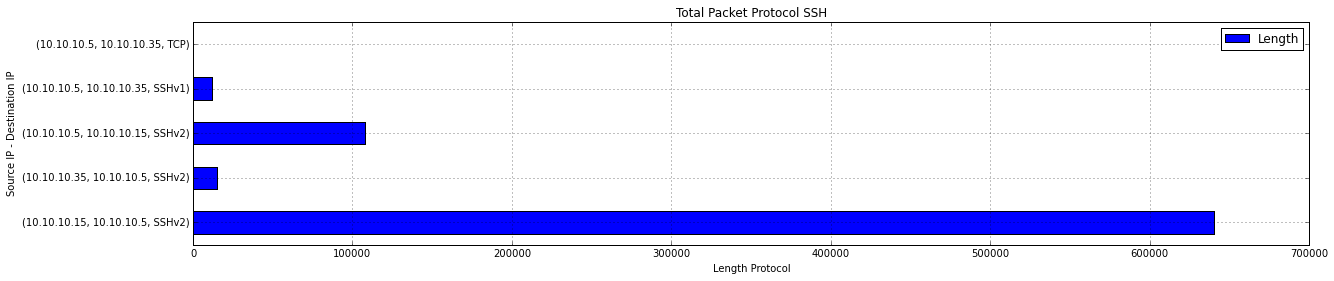

In [43]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Total Packet Protocol SSH",figsize=(20,4))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [44]:
fig = my_plot.get_figure()
fig.savefig("Total Packet Protocol SSH.png")